# Startup Investments

## Task

In the project, we need to analyze data on funds and investments and write queries to the database.

## Database map:

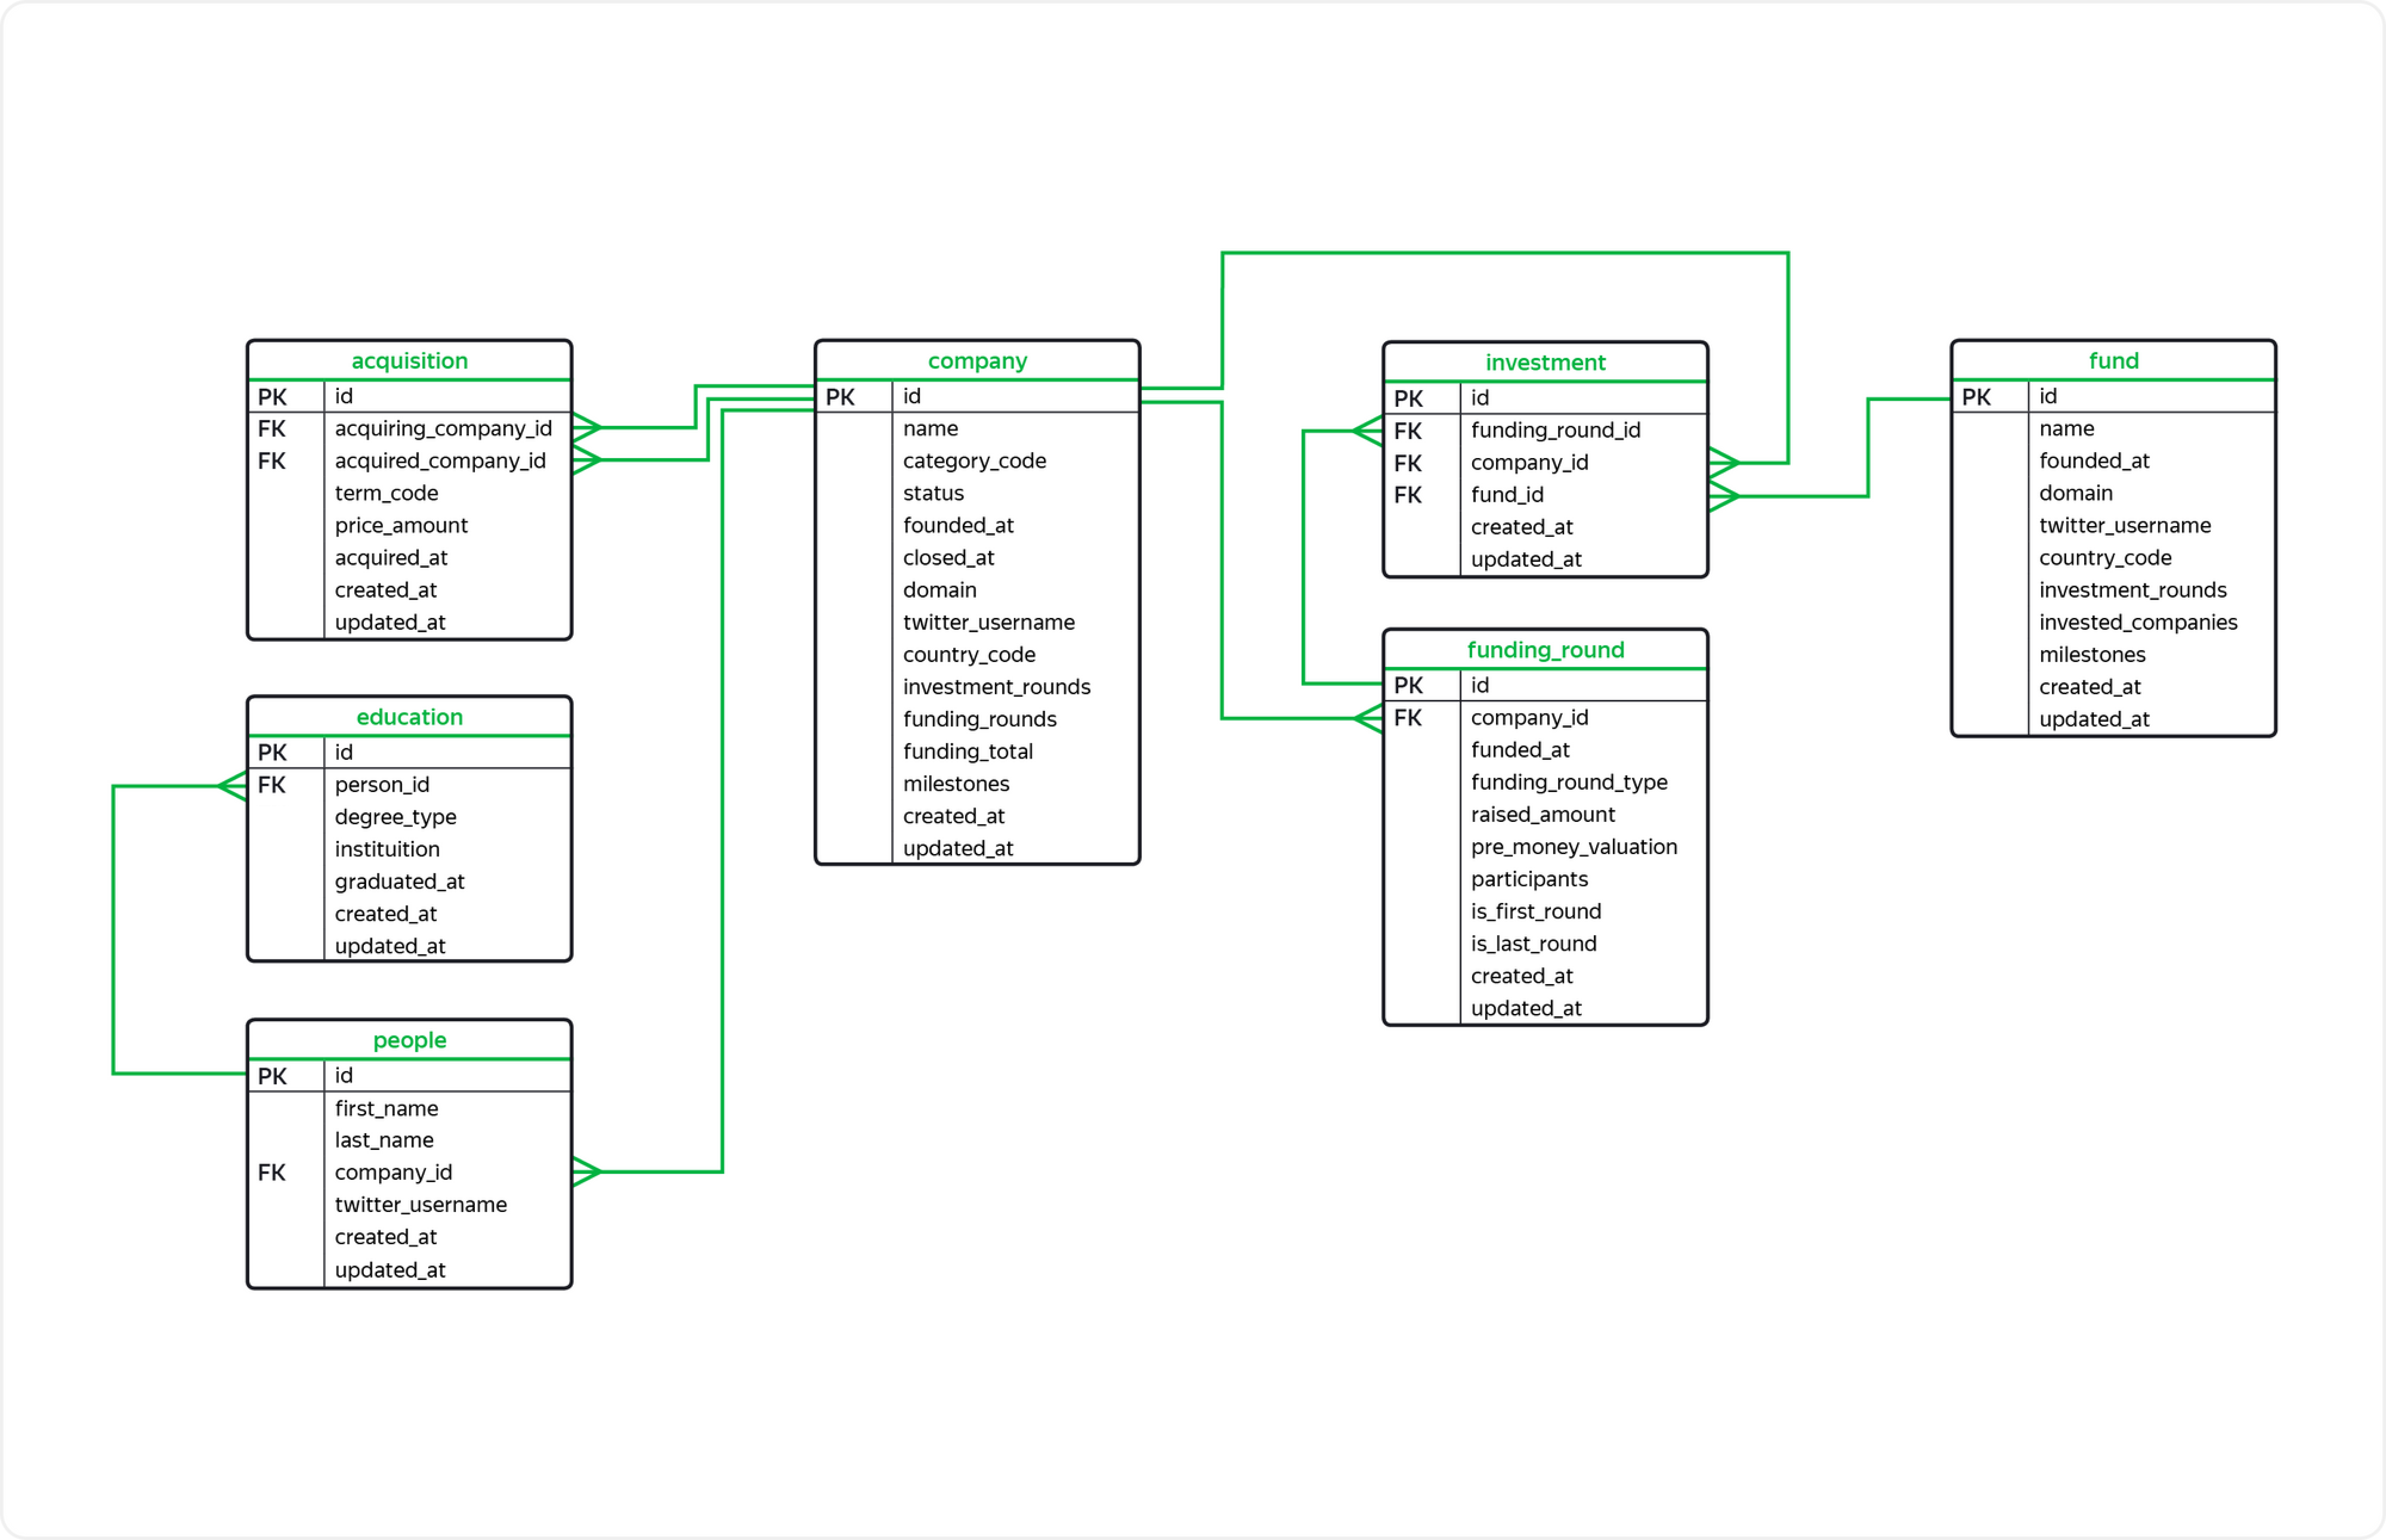

## Description of data:

#acquisition#

This table contains information about one company's purchases of another. 

The table includes the following fields: 
* Primary key id - an identifier or unique number for the purchase; 
* Foreign key acquiring_company_id - refers to the company table - the identifier of the buying company, i.e. the one that is buying another company; 
* Foreign key acquired_company_id - refers to the company table - the identifier of the company being bought; 
* Term_code - the payment method for the transaction: 
 * Cash - cash; 
 * Stock - company shares; 
 * Cash_and_stock - a mixed payment type: cash and shares. 
* Price_amount - the purchase amount in dollars; 
* Acquired_at - the date of the transaction; 
* Created_at - the date and time the record was created in the table; 
* Updated_at - the date and time the record was updated in the table.

#company#

This table contains information about startup companies. 

* The primary key id is an identifier or a unique number for the company; *name is the company's name; 
* category_code is the company's activity category, for example: 
 * news specializes in news work; 
 * social specializes in social work. 
* Status is the company's status: 
 * acquired is acquired; 
 * operating is active; 
 * ipo has gone public; 
 * closed has ceased to exist. 
* Founded_at is the date the company was founded; 
* closed_at is the date the company closed, which is specified if the company no longer exists; 
* domain is the company's website domain; 
* twitter_username is the company's profile name on Twitter; 
* country_code is the country code, for example USA for the US, GBR for the UK; 
* investment_rounds is the number of rounds in which the company participated as an investor; 
* funding_rounds is the number of rounds in which the company attracted investments; 
* funding_total is the amount of investments attracted in dollars; 
* milestones is the number of important stages in the company's history; 
* created_at is the date and time the record was created in the table; 
* updated_at is the date and time the record was updated in the table.

#education#


This table stores information about the education level of company employees.
* Primary key id - a unique record number with information about education;
* Foreign key person_id - refers to the people table - the identifier of the person whose information is presented in the record;
* Degree_type - educational degree, for example:
 * BA - Bachelor of Arts - Bachelor of Humanities;
 * MS - Master of Science - Master of Natural Sciences.
* Institution - educational institution, name of the university;
* Graduated_at - date of completion of studies, graduation;
* Created_at - date and time of creation of the record in the table;
* Updated_at - date and time of updating the record in the table.

#fund#

This table stores information about venture funds.
* Primary key id - unique number of the venture fund;
* Name - name of the venture fund;
* Founded_at - date of foundation of the fund;
* Domain - domain of the fund's website;
* Twitter_username - fund's profile on Twitter;
* Country_code - code of the fund's country;
* Investment_rounds - number of investment rounds the fund participated in;
* Invested_companies - number of companies the fund invested in;
* Milestones - number of important stages in the fund's history;
* Created_at - date and time of record creation in the table;
* Updated_at - date and time of record update in the table.

#funding_round#

This table contains information about investment rounds. 
* Primary key id - unique number of the investment round;
* Foreign key company_id - refers to the company table - unique number of the company that participated in the investment round;
* funded_at - date of the round;
* funding_round_type - type of investment round, e.g.:
 * venture - venture round;
 * angel - angel round;
 * series_a - round A;
* raised_amount - amount of investments attracted by the company in this round in dollars;
* pre_money_valuation - pre-investment assessment of the company's value in dollars;
* participants - number of participants in the investment round;
* is_first_round - is this round the first for the company;
* is_last_round - is this round the last for the company;
* created_at - date and time of record creation in the table;
* updated_at - date and time of record update in the table.

#investment#

This table contains information about venture fund investments in startup companies.
* Primary key id - unique investment number;
* Foreign key funding_round_id - refers to the funding_round table - unique investment round number;
* Foreign key company_id - refers to the company table - unique number of the startup company being invested in;
* Foreign key fund_id - refers to the fund table - unique number of the fund investing in the startup company;
* Created_at - date and time of record creation in the table;
* Updated_at - date and time of record update in the table.

#people#

This table contains information about employees of startup companies. 
* Primary key id - unique employee number; 
* First_name - employee's first name; 
* Last_name - employee's last name; 
* Foreign key company_id - refers to the company table - unique number of the startup company; 
* Twitter_username - employee's profile on Twitter; 
* Created_at - date and time of record creation in the table; 
* Updated_at - date and time of record update in the table.

## Tasks:

1. Calculate how many companies have closed.

In [ ]:
SELECT COUNT(id)
FROM company
WHERE status LIKE '%closed%'

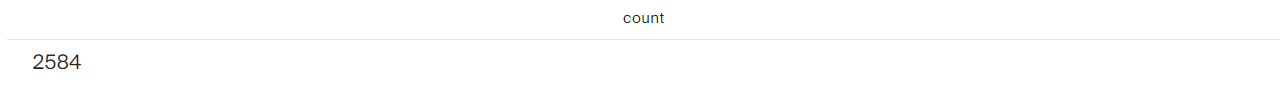

2. Display the amount of funds raised for US news companies from the company table. Sort the table in descending order of the values in the funding_total field.

In [ ]:
SELECT funding_total
FROM company
WHERE country_code = 'USA' AND category_code = 'news'
ORDER BY funding_total DESC;

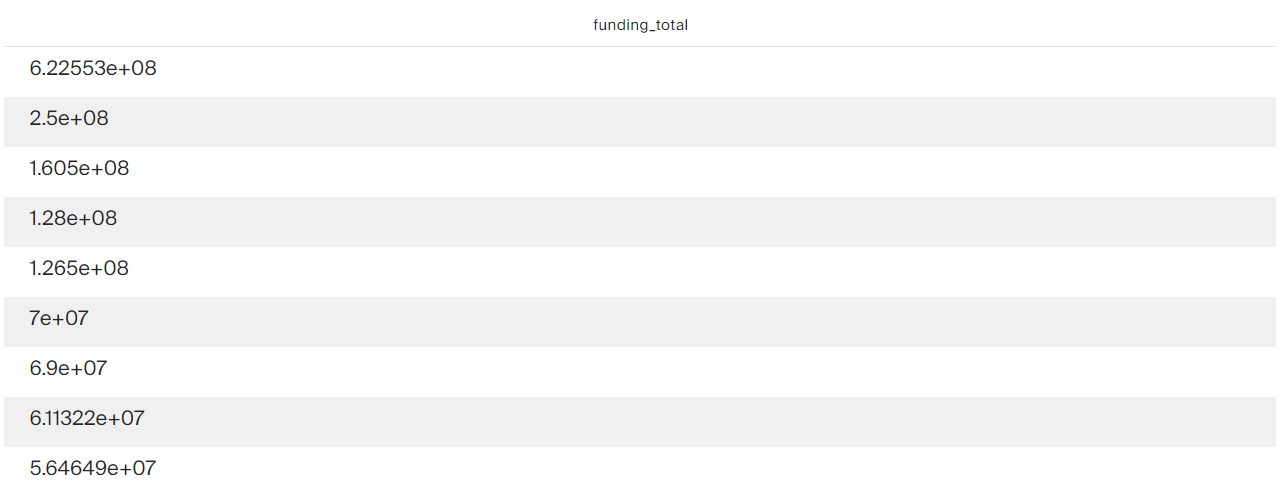

3. Find the total amount of buyout deals in dollars. Select deals that were done in cash only from 2011 to 2013 inclusive.

In [ ]:
SELECT SUM(price_amount)
FROM acquisition
WHERE term_code = 'cash'AND EXTRACT(YEAR FROM CAST(acquired_at AS timestamp)) BETWEEN 2011 AND 2013;

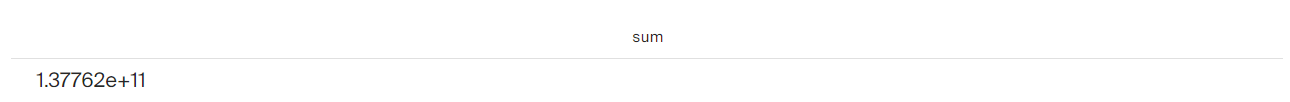

4. Display the name, surname and account names of people on Twitter whose account names start with 'Silver'.

In [ ]:
SELECT first_name,
       last_name,
       twitter_username
FROM people
WHERE twitter_username LIKE 'Silver%';

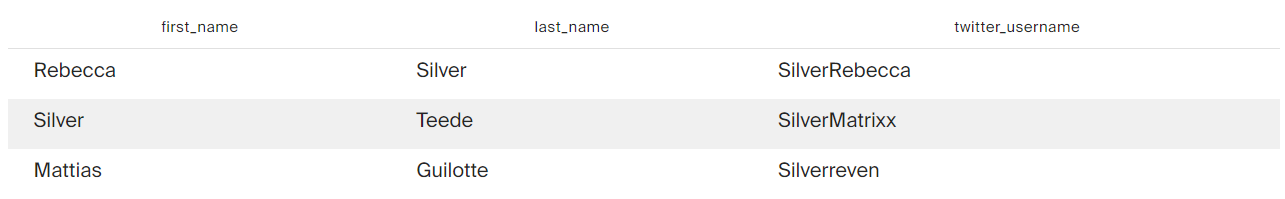

5. Display all the information about people whose Twitter account names contain the substring 'money' and whose surname starts with 'K'.

In [ ]:
SELECT *
FROM people
WHERE twitter_username LIKE '%money%' AND last_name LIKE 'K%';

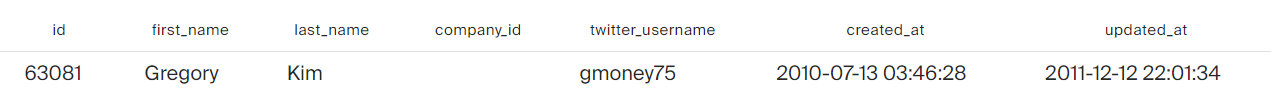

6. For each country, display the total amount of investments raised by companies registered in that country. The country in which the company is registered can be determined by the country code. Sort the data in descending order of the amount.

In [ ]:
SELECT country_code,
       SUM(funding_total) sum
FROM company
GROUP BY country_code
ORDER BY sum DESC;

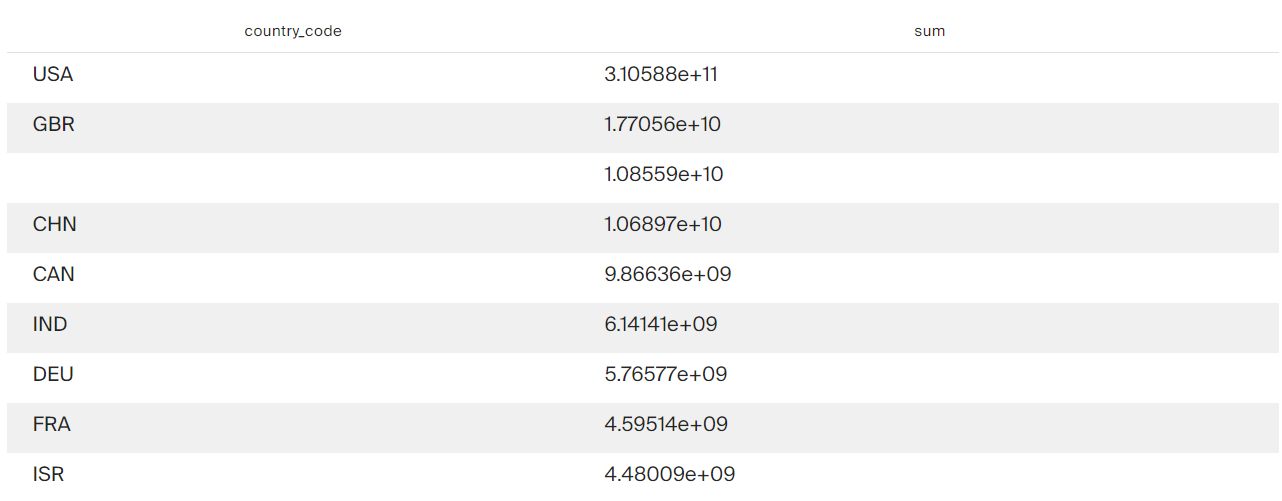

7. Compile a table that includes the date of the round, as well as the minimum and maximum values of the amount of investments raised on that date. Leave only those records in the final table where the minimum value of the investment amount is not zero and not equal to the maximum value.

In [ ]:
WITH ss AS

(SELECT funded_at::date date_am,
       MIN(raised_amount) min_am,
       MAX(raised_amount) max_am
FROM funding_round

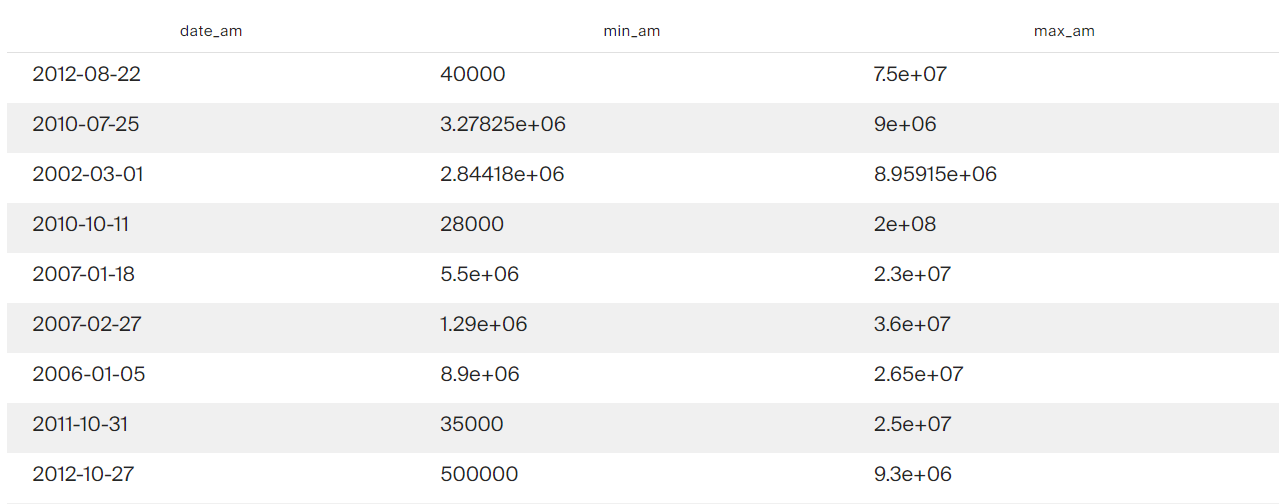

8. Create a field with categories: 
* For funds that invest in 100 or more companies, assign the category high_activity. 
* For funds that invest in 20 or more companies up to 100, assign the category middle_activity. 
* If the number of companies invested by the fund does not reach 20, assign the category low_activity. 

Display all fields of the fund table and the new field with categories.

In [ ]:
SELECT *,
    CASE
        WHEN invested_companies >= 100 THEN 'high_activity'
        WHEN (invested_companies >= 20 AND invested_companies < 100) THEN 'middle_activity'
        WHEN invested_companies < 20 THEN 'low_activity'
    END
FROM fund;

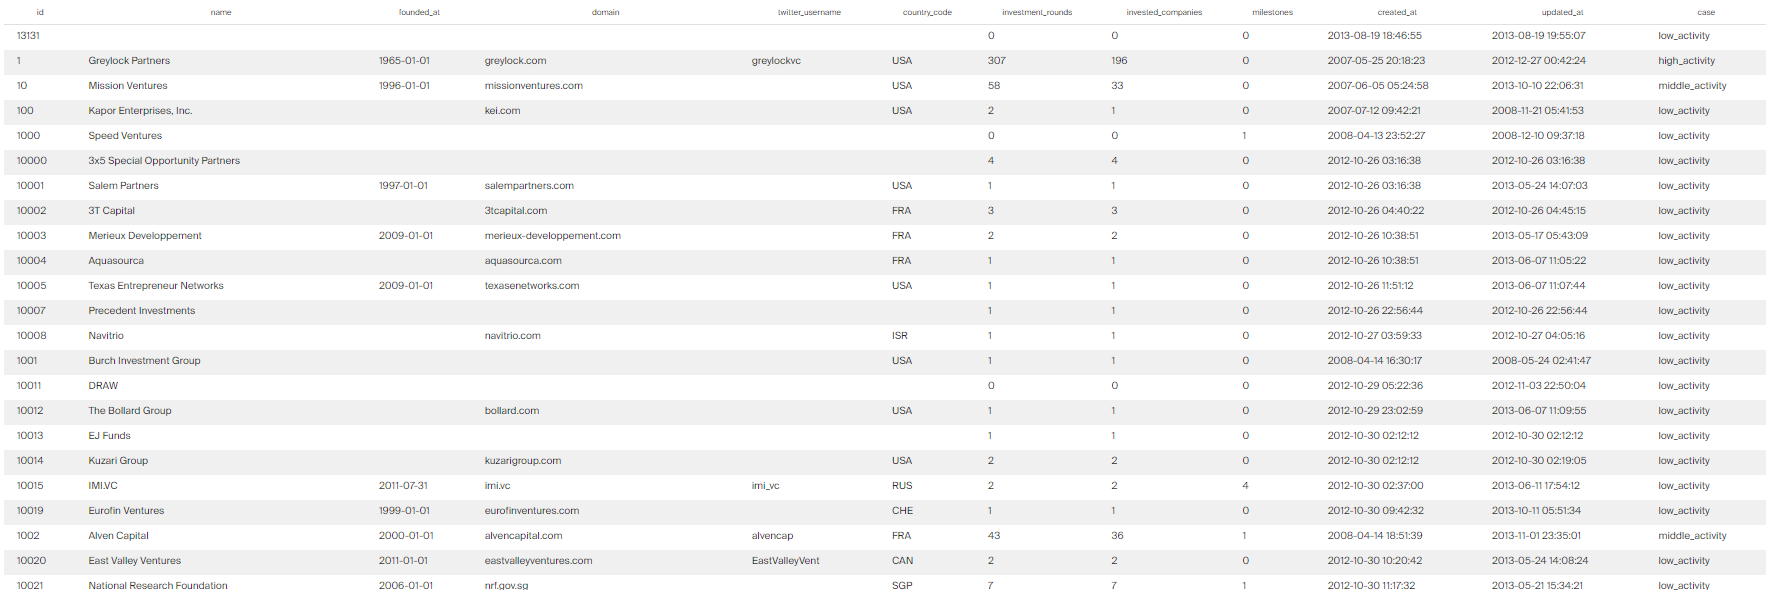

9. For each of the categories assigned in the previous task, calculate the rounded to the nearest whole number average number of investment rounds in which the fund participated. Display the categories and the average number of investment rounds. Sort the table in ascending order of the average.

In [ ]:
WITH ss AS

(SELECT *,
       CASE
           WHEN invested_companies>=100 THEN 'high_activity'
           WHEN invested_companies>=20 THEN 'middle_activity'
           ELSE 'low_activity'
       END AS activity
FROM fund)

SELECT activity,
       ROUND(AVG(investment_rounds)) avg_rounds
FROM ss
GROUP BY activity
ORDER BY avg_rounds;

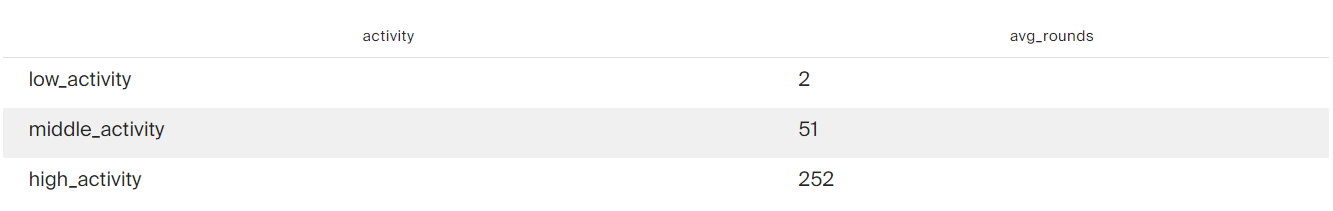

10. Analyze which countries have funds that most often invest in startups. For each country, calculate the minimum, maximum, and average number of companies that the funds of that country invested in, based on 2010 to 2012 inclusive. Exclude countries with funds that have a minimum number of companies receiving investments equal to zero.
Export the ten most active investor countries: sort the table by the average number of companies from largest to smallest. Then add sorting by country code in lexicographical order.

In [ ]:
WITH ss AS

(SELECT DISTINCT country_code,
       MIN(invested_companies) min_comp,
       MAX(invested_companies) max_comp,
       AVG(invested_companies) avg_comp
FROM fund
WHERE EXTRACT(YEAR FROM CAST(founded_at AS timestamp)) BETWEEN 2010 AND 2012
GROUP BY country_code)

SELECT *
FROM ss
WHERE min_comp > 0
ORDER BY avg_comp DESC,
         country_code
LIMIT 10;

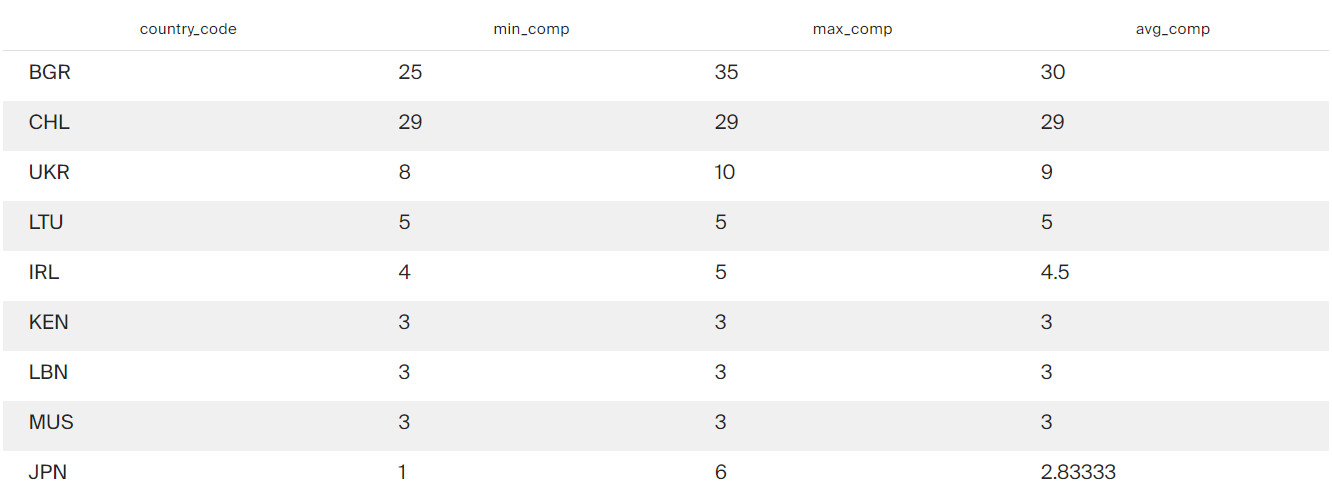

11. Display the name and surname of all startup employees. Add a field with the name of the educational institution that the employee graduated from, if this information is known.

In [ ]:
SELECT pl.first_name,
       pl.last_name,
       ed.instituition
FROM education ed
RIGHT OUTER JOIN people pl ON ed.person_id = pl.id

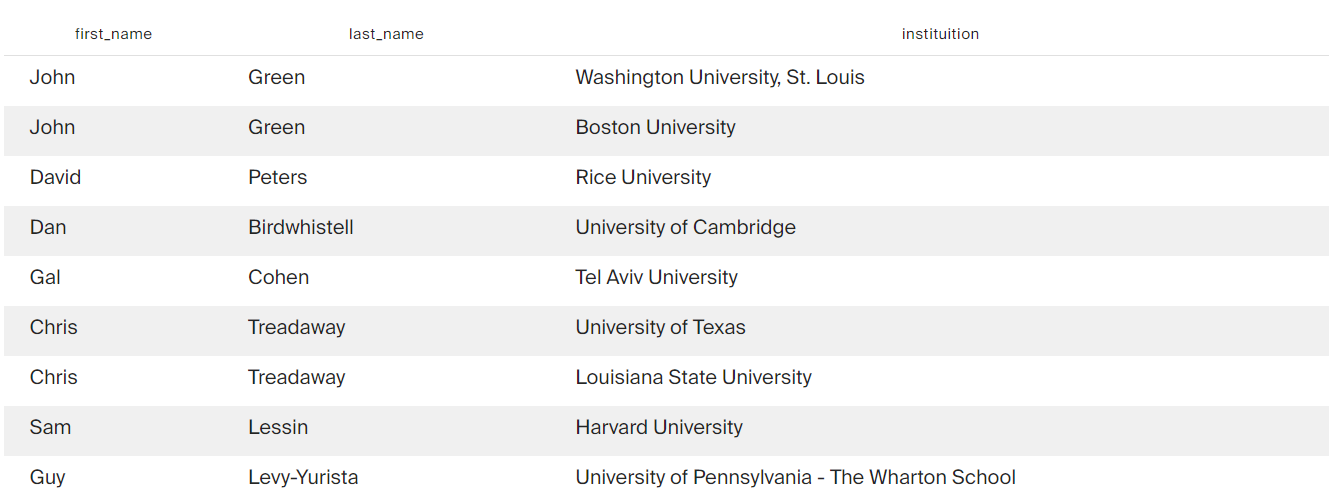

12. For each company, find the number of educational institutions that its employees graduated from. Display the company name and the number of unique educational institution names. Compile a top-5 of companies by the number of universities.

In [ ]:
WITH ss AS

(SELECT *
FROM company com
LEFT OUTER JOIN people pl ON com.id = pl.company_id
LEFT OUTER JOIN education ed on pl.id = ed.person_id)

SELECT name,
       COUNT(DISTINCT instituition) 
FROM ss
GROUP BY name
ORDER BY count DESC
LIMIT 5;

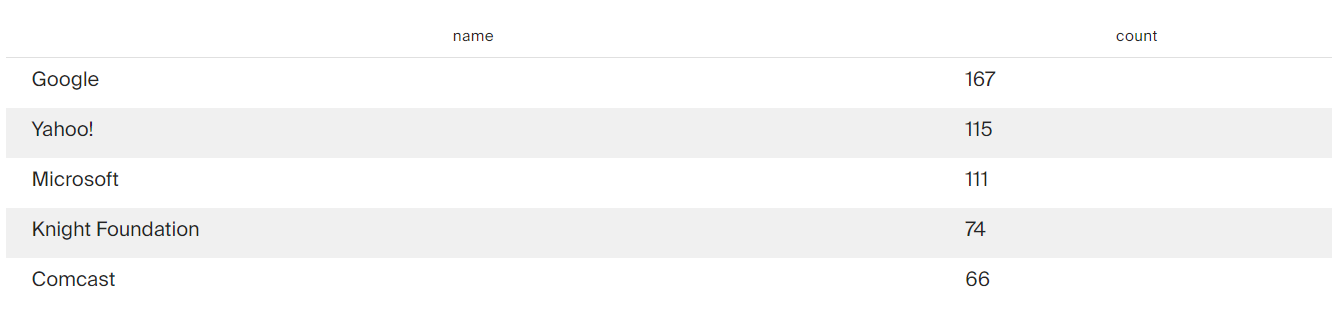

13. Compile a list with unique names of closed companies for which the first round of financing was the last.

In [ ]:
SELECT distinct(com.name)
FROM company com
JOIN funding_round fr ON com.id = fr.company_id
WHERE fr.is_first_round = 1
    and fr.is_last_round = 1
    and com.status = 'closed'

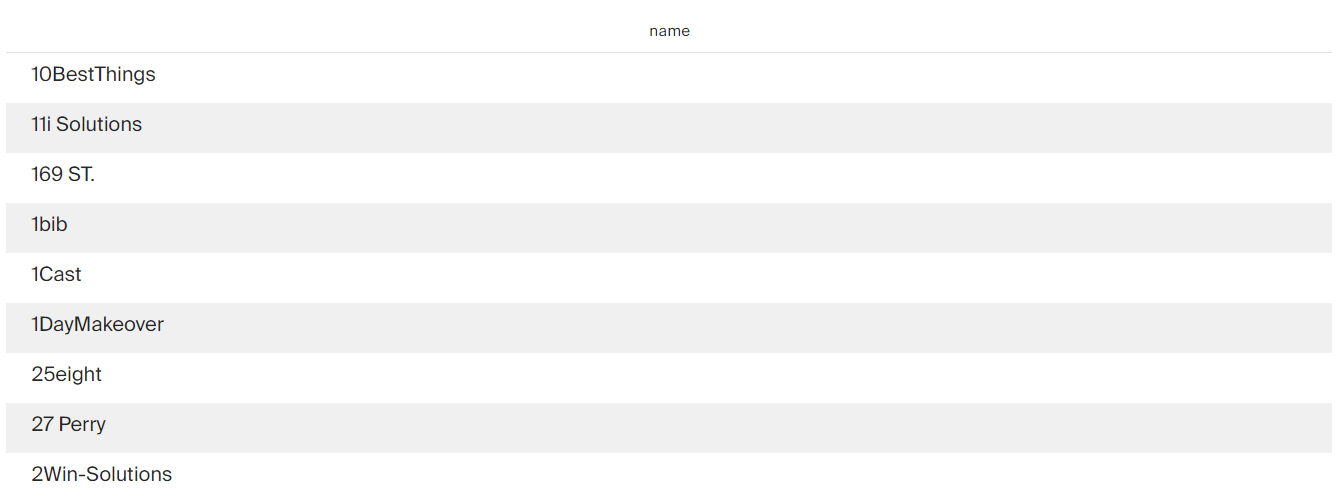

14. Compile a list of unique employee numbers who work in the companies selected in the previous task.

In [ ]:
SELECT distinct(pl.id)
FROM people pl
JOIN (SELECT distinct(com.id)
FROM company com
JOIN funding_round fr ON com.id = fr.company_id
WHERE fr.is_first_round = 1
    and fr.is_last_round = 1
    and com.status = 'closed') gg ON pl.company_id = gg.id

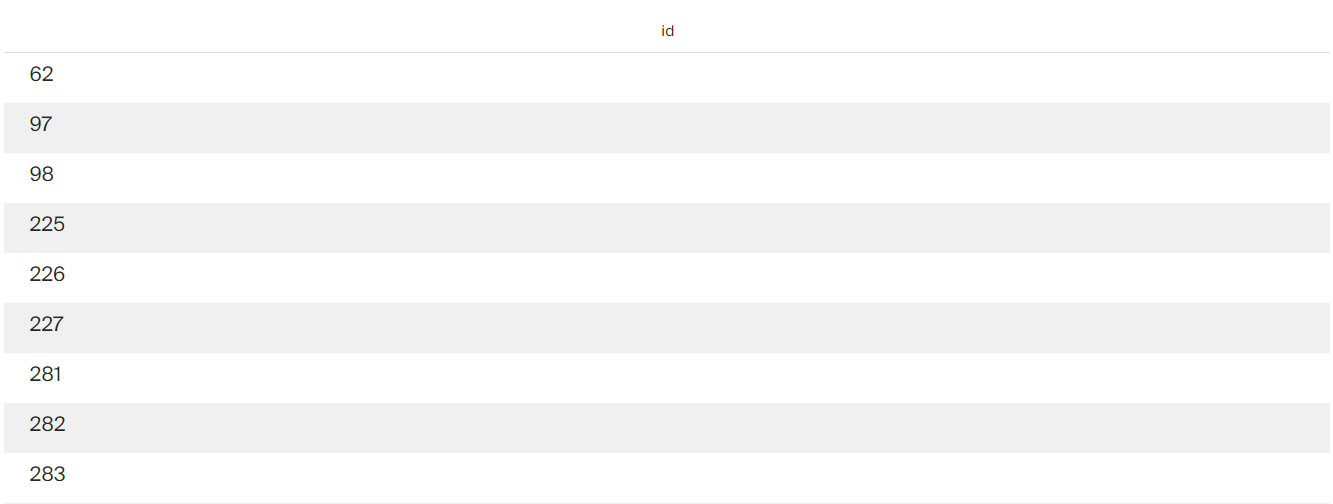

15. Compile a table with unique pairs of employee numbers from the previous task and the educational institution that the employee graduated from.

In [ ]:
vSELECT distinct(ggg.id),
       instituition
FROM education ed
JOIN (SELECT distinct(pl.id)
FROM people pl
JOIN (SELECT distinct(com.id)
FROM company com
JOIN funding_round fr ON com.id = fr.company_id
WHERE fr.is_first_round = 1
    and fr.is_last_round = 1
    and com.status = 'closed') gg ON pl.company_id = gg.id) ggg ON ggg.id = ed.person_id

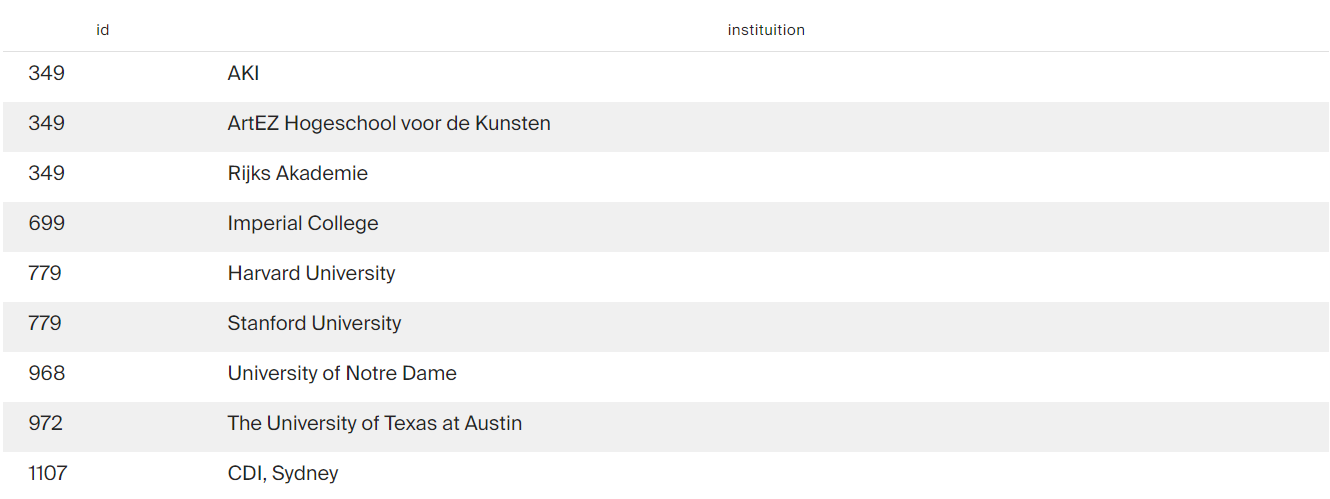

16. Count the number of educational institutions for each employee from the previous task. When counting, consider that some employees may have finished the same institution twice.

In [ ]:
SELECT distinct(ggg.id),
       COUNT(instituition)
FROM education ed
JOIN (SELECT distinct(pl.id)
FROM people pl
JOIN (SELECT distinct(com.id)
FROM company com
JOIN funding_round fr ON com.id = fr.company_id
WHERE fr.is_first_round = 1
    and fr.is_last_round = 1
    and com.status = 'closed') gg ON pl.company_id = gg.id) ggg ON ggg.id = ed.person_id
GROUP BY ggg.id

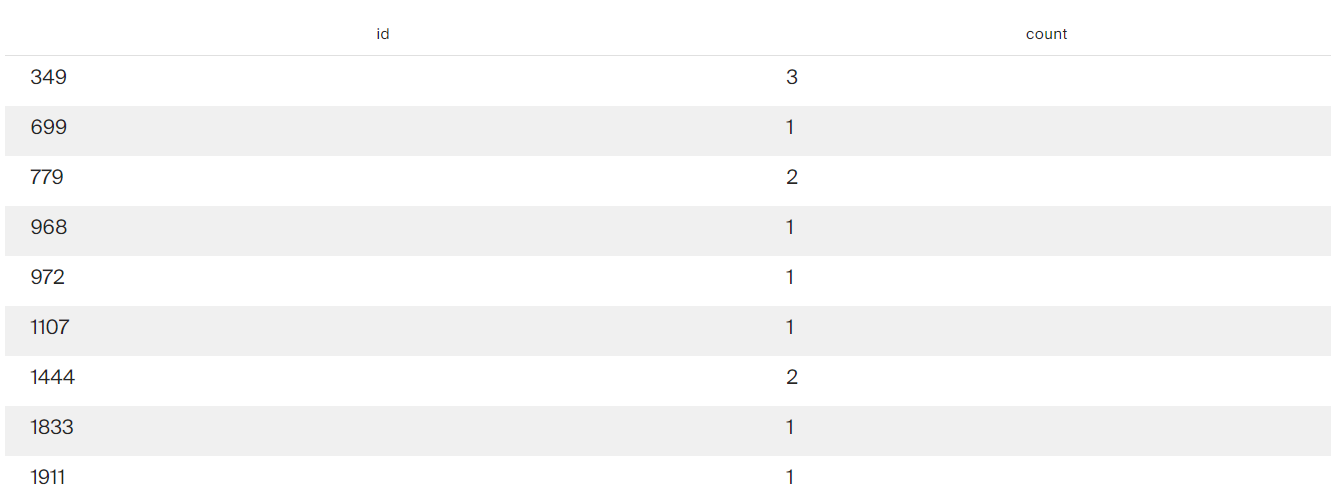

17. Enhance the previous query and output the average number of educational institutions (all, not only unique) that employees of different companies have finished. Only one record should be outputted, grouping is not needed here.

In [ ]:
WITH sas AS
(SELECT distinct(ggg.id),
       COUNT(instituition)
FROM education ed
JOIN (SELECT distinct(pl.id)
FROM people pl
JOIN (SELECT distinct(com.id)
FROM company com
JOIN funding_round fr ON com.id = fr.company_id
WHERE fr.is_first_round = 1
    and fr.is_last_round = 1
    and com.status = 'closed') gg ON pl.company_id = gg.id) ggg ON ggg.id = ed.person_id
GROUP BY ggg.id)

SELECT SUM(count)/COUNT(*)
FROM sas

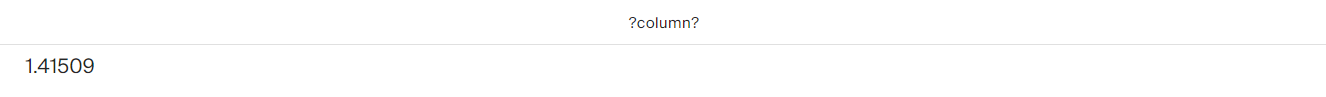

18. Write a similar query: output the average number of educational institutions (all, not only unique) that employees of Facebook have finished.

In [ ]:
WITH sas AS
(SELECT distinct(ggg.id),
       COUNT(instituition)
FROM education ed
JOIN (SELECT distinct(pl.id)
FROM people pl
JOIN (SELECT distinct(com.id)
FROM company com
JOIN funding_round fr ON com.id = fr.company_id
WHERE com.name LIKE '%Facebook%' ) gg ON pl.company_id = gg.id) ggg ON ggg.id = ed.person_id
GROUP BY ggg.id)

SELECT SUM(count)/COUNT(*)
FROM sas

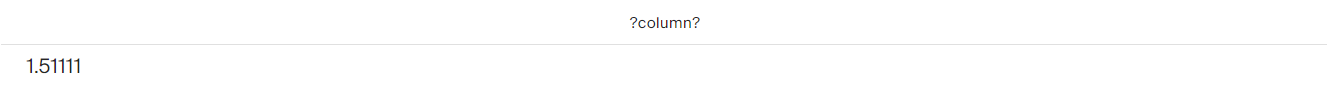

19. Create a table with the fields: 
* name_of_fund - name of the fund; 
* name_of_company - name of the company; 
* amount - amount of investment attracted by the company in the round.

The table will include data on companies that have had more than six important stages in their history, and the financing rounds took place from 2012 to 2013 inclusive.

In [ ]:
SELECT fu.name name_of_fund,
       com.name name_of_company,
       fr.raised_amount amount
FROM investment inv
INNER JOIN company com ON  com.id = inv.company_id
INNER JOIN fund fu ON  fu.id = inv.fund_id
INNER JOIN funding_round fr ON inv.funding_round_id = fr.id
WHERE com.milestones > 6
      AND EXTRACT(YEAR FROM CAST(fr.funded_at AS timestamp)) BETWEEN 2012 AND 2013;

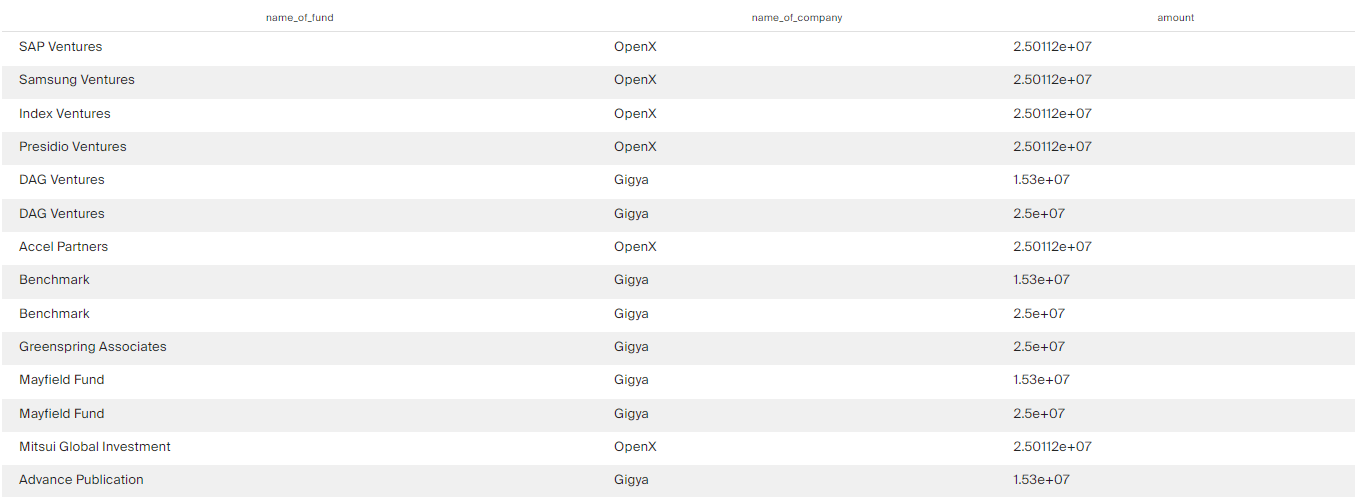

20. Create a table with the fields: 
* name of the buyer company; 
* amount of the deal; 
* name of the company bought; 
* amount of investments made in the bought company; 
* share that reflects how many times the amount of the purchase exceeded the amount of investments made in the company, rounded to the nearest integer.

Do not consider those deals where the amount of the purchase is zero. If the amount of investments in the company is zero, exclude such a company from the table.

Sort the table by the amount of the deal from the largest to the smallest, and then by the name of the bought company in lexicographical order. Limit the table to the first ten records.

In [ ]:
SELECT buyer.name buyer_name,
       acq.price_amount price,
       buyee.name buyee_name,
       buyee.funding_total ttl_invest,
       ROUND(acq.price_amount / buyee.funding_total) ratio
FROM acquisition acq
FULL OUTER JOIN company buyer ON acq.acquiring_company_id = buyer.id
FULL OUTER JOIN company buyee ON acq.acquired_company_id = buyee.id
WHERE acq.price_amount <> 0
    AND buyee.funding_total <> 0
ORDER BY price DESC, 
         buyee_name
LIMIT 10;

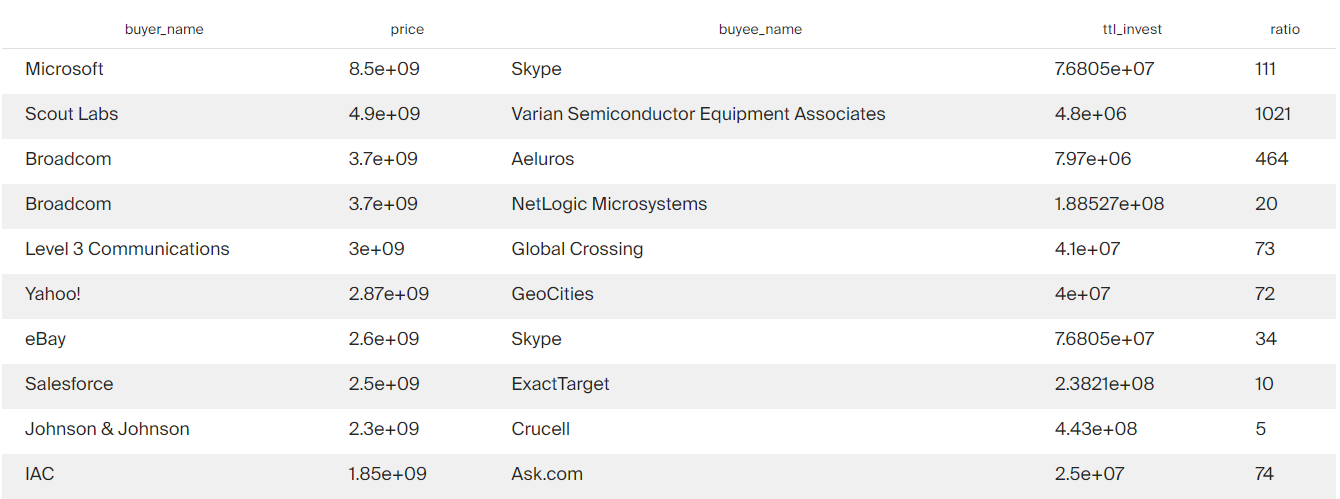

21. Create a table containing the names of social companies that received funding from 2010 to 2013, inclusive. Ensure that the total investment is not equal to zero. Also output the month number in which the funding round took place.

In [ ]:
SELECT com.name,
       EXTRACT(MONTH FROM CAST(fr.funded_at AS timestamp))
FROM company com
FULL OUTER JOIN funding_round fr ON com.id = fr.company_id
WHERE com.category_code = 'social'
    AND fr.raised_amount > 0
    AND EXTRACT(YEAR FROM CAST(fr.funded_at AS timestamp)) BETWEEN 2010 AND 2013;

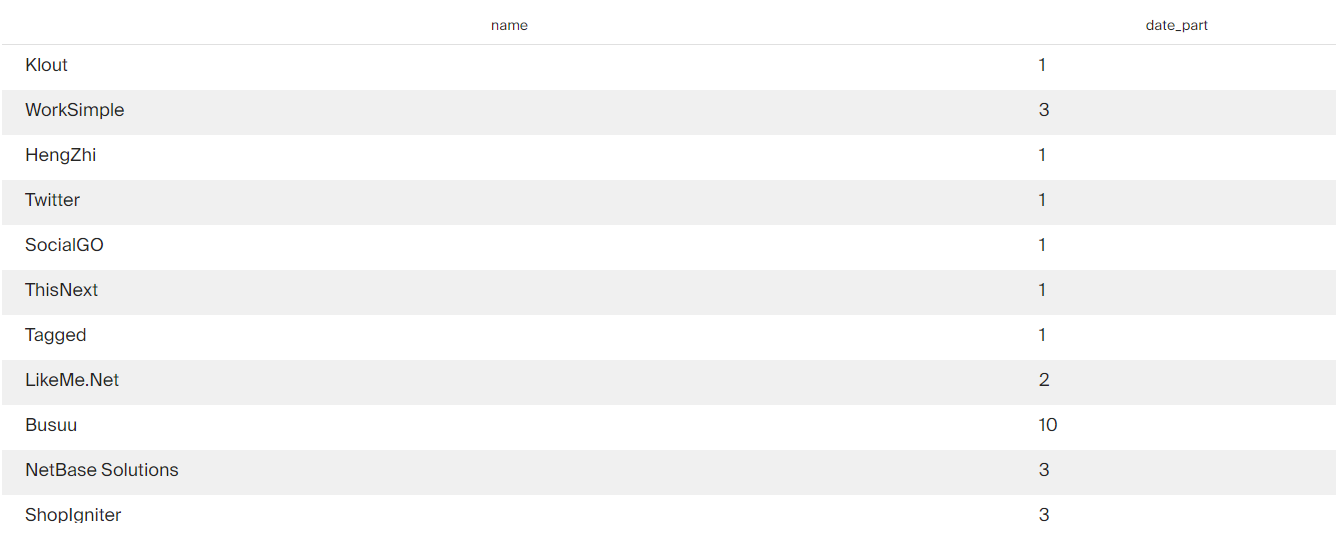

22. Select data from the months of 2010 to 2013 when investment rounds took place. Group the data by month number and create a table with the following fields: 
* month number in which the rounds took place; 
* number of unique US funds that invested in that month; 
* number of companies purchased in that month; 
* total amount of purchase deals in that month.

In [ ]:
WITH first_t AS

(SELECT EXTRACT(MONTH FROM CAST(fr.funded_at AS timestamp)) month_round,
       COUNT(DISTINCT fu.name) count_fund
FROM investment inv
JOIN funding_round fr ON inv.funding_round_id = fr.id
JOIN fund fu ON inv.fund_id = fu.id
WHERE fu.country_code = 'USA'
    AND EXTRACT(YEAR FROM CAST(fr.funded_at AS timestamp)) BETWEEN 2010 AND 2013
GROUP BY month_round),

second_t AS
(SELECT EXTRACT(MONTH FROM CAST(acquired_at AS timestamp)) month_buyee,
       COUNT(acquired_company_id) count_buyee_comp,
       SUM(price_amount) sum_amount
FROM acquisition
WHERE EXTRACT(YEAR FROM CAST(acquired_at AS timestamp)) BETWEEN 2010 AND 2013
GROUP BY month_buyee)

SELECT f.month_round,
       f.count_fund,
       s.count_buyee_comp,
       s.sum_amount
FROM first_t f
JOIN second_t s ON f.month_round = s.month_buyee;

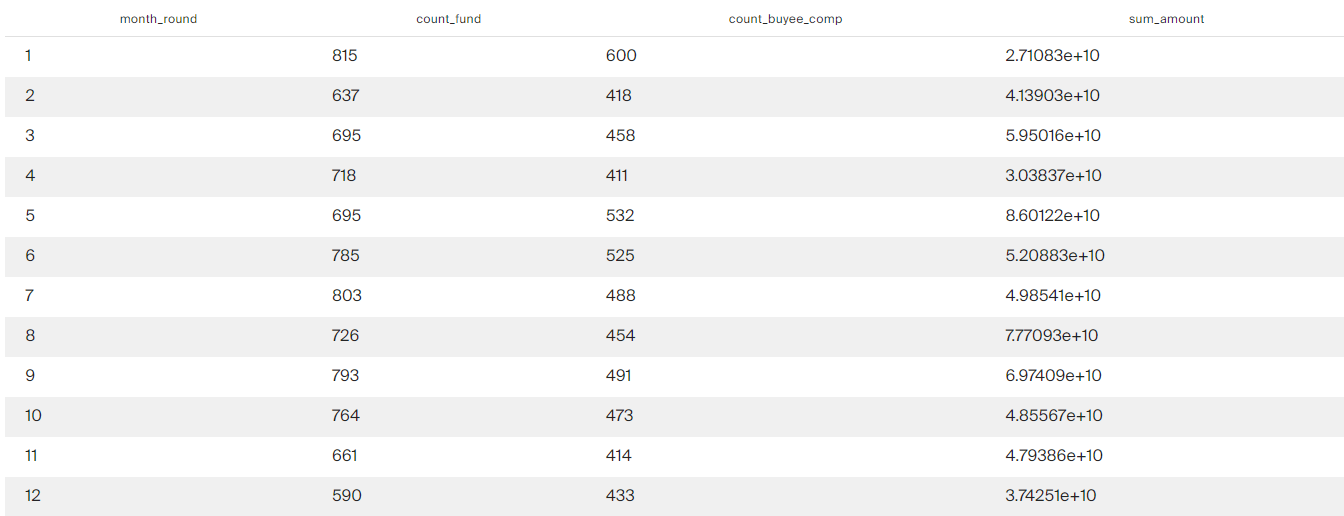

23. Create a summary table and output the average investment amount for countries with startups registered in 2011, 2012, and 2013. Each year should be in a separate field. Sort the table by the average investment value for 2011 from highest to lowest.

In [ ]:
WITH y2011 AS
(SELECT country_code,
    AVG(funding_total) year_2011
FROM company
WHERE EXTRACT(YEAR FROM CAST(founded_at AS timestamp)) = 2011
GROUP BY country_code),

y2012 AS
(SELECT country_code,
    AVG(funding_total) year_2012
FROM company
WHERE EXTRACT(YEAR FROM CAST(founded_at AS timestamp)) = 2012
GROUP BY country_code),

y2013 AS
(SELECT country_code,
    AVG(funding_total) year_2013
FROM company
WHERE EXTRACT(YEAR FROM CAST(founded_at AS timestamp)) = 2013
GROUP BY country_code)

SELECT y2011.country_code,
    y2011.year_2011,
    y2012.year_2012,
    y2013.year_2013
FROM y2011 AS y2011 
JOIN y2012 AS y2012 ON y2011.country_code = y2012.country_code
JOIN y2013 AS y2013 ON y2011.country_code = y2013.country_code
ORDER BY y2011.year_2011 DESC

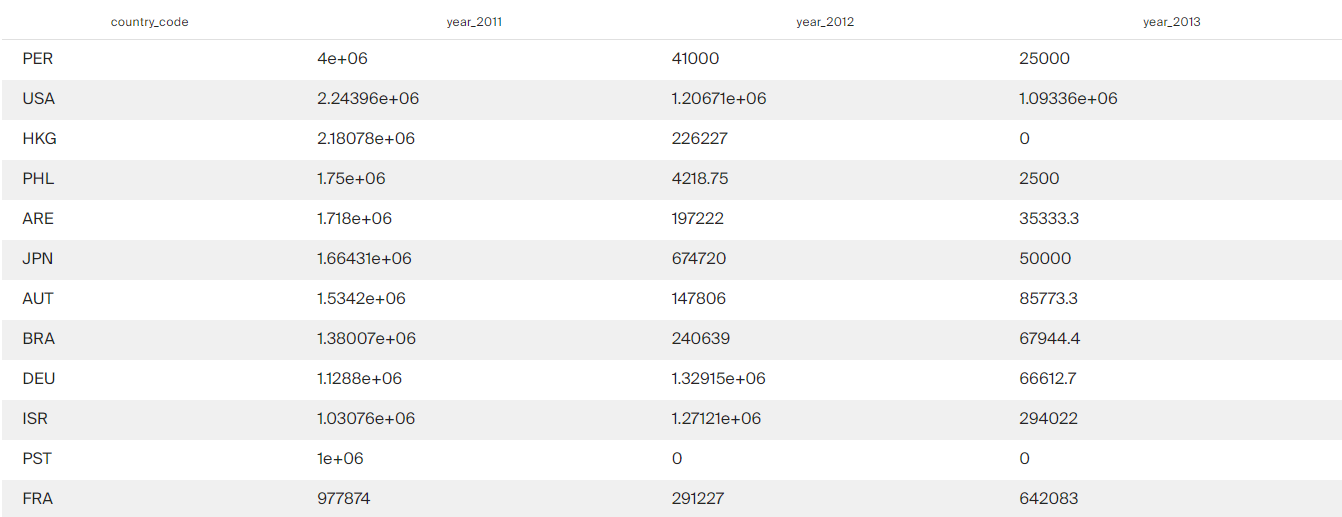